# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_per_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

print(total_rides_per_type)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [4]:
# 2. Get the total drivers for each city type
total_driver_per_type =  city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_per_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_per_type =  pyber_data_df.groupby(["type"]).sum()["fare"] 

total_fares_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per driver for each city type.
avg_fare_per_driver=total_fares_per_type/total_driver_per_type

print(avg_fare_per_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [7]:
# 5. Get the average fare per ride for each city type  
avg_fare_per_ride=total_fares_per_type/total_rides_per_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. Total Rides ,Total Drivers, Total Fares, Average Fare per Ride, Average Fare per Driver
#  7. Cleaning up the DataFrame. Delete the index name
#  8. Format the columns.
pyber_summary_df=pd.DataFrame({
    "Total Rides": total_rides_per_type.map("{:,}".format),
                              "Total Drivers": total_driver_per_type.map("{:,}".format),
                               "Total Fares": total_fares_per_type.map("${:,.0f}".format),
                               "Average Fare per Ride": avg_fare_per_ride.map("${:,.0f}".format),
                                "Average Fare per Driver": avg_fare_per_driver.map("${:,.0f}".format)})

pyber_summary_df.index.name = None
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,328",$35,$55
Suburban,625,490,"$19,356",$31,$40
Urban,"1,625","2,405","$39,854",$25,$17


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [9]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [18]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fares_date=pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

ride_count_date=pyber_data_df.groupby(["type", "date"]).count()[["ride_id"]]

print(fares_date.head())
print(ride_count_date)

                        fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
                       ride_id
type  date                    
Rural 1/1/2019 9:45          1
      1/11/2019 4:39         1
      1/14/2019 15:58        1
      1/14/2019 7:09         1
      1/15/2019 21:44        1
...                        ...
Urban 5/8/2019 1:54          1
      5/8/2019 2:31          1
      5/8/2019 4:20          1
      5/8/2019 4:39          1
      5/8/2019 7:29          1

[2364 rows x 1 columns]


In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_date=fares_date.reset_index()

print(fares_date)
#fares_date.dtypes

ride_count_date=ride_count_date.reset_index()
print(ride_count_date)

       type             date   fare
0     Rural    1/1/2019 9:45  43.69
1     Rural   1/11/2019 4:39  16.42
2     Rural  1/14/2019 15:58  54.10
3     Rural   1/14/2019 7:09  18.05
4     Rural  1/15/2019 21:44  30.26
...     ...              ...    ...
2359  Urban    5/8/2019 1:54  32.69
2360  Urban    5/8/2019 2:31  41.33
2361  Urban    5/8/2019 4:20  21.99
2362  Urban    5/8/2019 4:39  18.45
2363  Urban    5/8/2019 7:29  18.55

[2364 rows x 3 columns]
       type             date  ride_id
0     Rural    1/1/2019 9:45        1
1     Rural   1/11/2019 4:39        1
2     Rural  1/14/2019 15:58        1
3     Rural   1/14/2019 7:09        1
4     Rural  1/15/2019 21:44        1
...     ...              ...      ...
2359  Urban    5/8/2019 1:54        1
2360  Urban    5/8/2019 2:31        1
2361  Urban    5/8/2019 4:20        1
2362  Urban    5/8/2019 4:39        1
2363  Urban    5/8/2019 7:29        1

[2364 rows x 3 columns]


In [32]:
fares_date["date"]=pd.to_datetime(fares_date["date"])
print(fares_date)

ride_count_date["date"]=pd.to_datetime(ride_count_date["date"])
print(ride_count_date)

       type                date   fare
0     Rural 2019-01-01 09:45:00  43.69
1     Rural 2019-01-11 04:39:00  16.42
2     Rural 2019-01-14 15:58:00  54.10
3     Rural 2019-01-14 07:09:00  18.05
4     Rural 2019-01-15 21:44:00  30.26
...     ...                 ...    ...
2359  Urban 2019-05-08 01:54:00  32.69
2360  Urban 2019-05-08 02:31:00  41.33
2361  Urban 2019-05-08 04:20:00  21.99
2362  Urban 2019-05-08 04:39:00  18.45
2363  Urban 2019-05-08 07:29:00  18.55

[2364 rows x 3 columns]
       type                date  ride_id
0     Rural 2019-01-01 09:45:00        1
1     Rural 2019-01-11 04:39:00        1
2     Rural 2019-01-14 15:58:00        1
3     Rural 2019-01-14 07:09:00        1
4     Rural 2019-01-15 21:44:00        1
...     ...                 ...      ...
2359  Urban 2019-05-08 01:54:00        1
2360  Urban 2019-05-08 02:31:00        1
2361  Urban 2019-05-08 04:20:00        1
2362  Urban 2019-05-08 04:39:00        1
2363  Urban 2019-05-08 07:29:00        1

[2364 rows x 3

In [33]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_date_pivot=fares_date.pivot(index="date",columns="type",values="fare")
print(fares_date_pivot.dtypes)
print(fares_date_pivot)

#ride_count_date_pivot=ride_count_date.pivot(index="date",columns="type",values="ride_id",aggfunc="count")
#print(ride_count_pivot)
ride_count_date_pivot = pd.pivot_table(ride_count_date, index= 'date', columns='type', values= 'ride_id', aggfunc='count')
print(ride_count_date_pivot)

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object
type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN  37.91
2019-01-01 00:46:00    NaN     47.74    NaN
2019-01-01 02:07:00    NaN     24.07    NaN
2019-01-01 03:46:00    NaN       NaN   7.57
2019-01-01 05:23:00    NaN       NaN  10.75
...                    ...       ...    ...
2019-05-08 04:20:00    NaN       NaN  21.99
2019-05-08 04:39:00    NaN       NaN  18.45
2019-05-08 07:29:00    NaN       NaN  18.55
2019-05-08 11:38:00    NaN       NaN  19.77
2019-05-08 13:10:00    NaN       NaN  18.04

[2361 rows x 3 columns]
type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN    1.0
2019-01-01 00:46:00    NaN       1.0    NaN
2019-01-01 02:07:00    NaN       1.0    NaN
2019-01-01 03:46:00    NaN       NaN    1.0
2019-01-01 05:23:00    NaN       NaN    1.0
...             

In [45]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date1="2019-01-01"
date2="2019-04-28"
#mask = (fares_date_pivot['date'] >= date1) & (fares_date_pivot['date'] <= date2)
fares_date_2019=fares_date_pivot.loc[date1:date2]
print(fares_date_2019)
print(len(fares_date_2019))

ride_count_2019=ride_count_date_pivot.loc[date1:date2]
print(ride_count_2019)
#print(len(ride_count_2019))

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN  37.91
2019-01-01 00:46:00    NaN     47.74    NaN
2019-01-01 02:07:00    NaN     24.07    NaN
2019-01-01 03:46:00    NaN       NaN   7.57
2019-01-01 05:23:00    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:00    NaN       NaN  11.46
2019-04-28 16:29:00    NaN       NaN  36.42
2019-04-28 17:26:00    NaN       NaN  31.43
2019-04-28 17:38:00    NaN     34.87    NaN
2019-04-28 19:35:00    NaN     16.96    NaN

[2182 rows x 3 columns]
2182
type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN    1.0
2019-01-01 00:46:00    NaN       1.0    NaN
2019-01-01 02:07:00    NaN       1.0    NaN
2019-01-01 03:46:00    NaN       NaN    1.0
2019-01-01 05:23:00    NaN       NaN    1.0
...                    ...       ...    ...
2019-04-28 14:28:00    NaN       NaN    1.0
20

# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
see step 3

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_date_pivot.info()

In [44]:
monthly_fares_winter_2019_df=fares_date_2019.resample('M').sum()
print(f"Monthly Fares",monthly_fares_winter_2019_df)
monthly_rides_winter_2019_df=ride_count_2019.resample('M').count()
print(f"Monthly Rides",monthly_rides_winter_2019_df)

Monthly Fares type          Rural  Suburban    Urban
date                                  
2019-01-31   940.00   4796.08  9054.33
2019-02-28   919.17   4442.70  8875.99
2019-03-31   877.50   4341.99  9845.95
2019-04-30  1177.02   4302.57  9289.51
Monthly Rides type        Rural  Suburban  Urban
date                              
2019-01-31     27       147    366
2019-02-28     26       142    366
2019-03-31     26       142    406
2019-04-30     35       139    363


In [39]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_winter_2019_df=fares_date_2019.resample('W').sum()
weekly_fares_winter_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [ ]:
weekly_fares_winter_2019_df.describe()

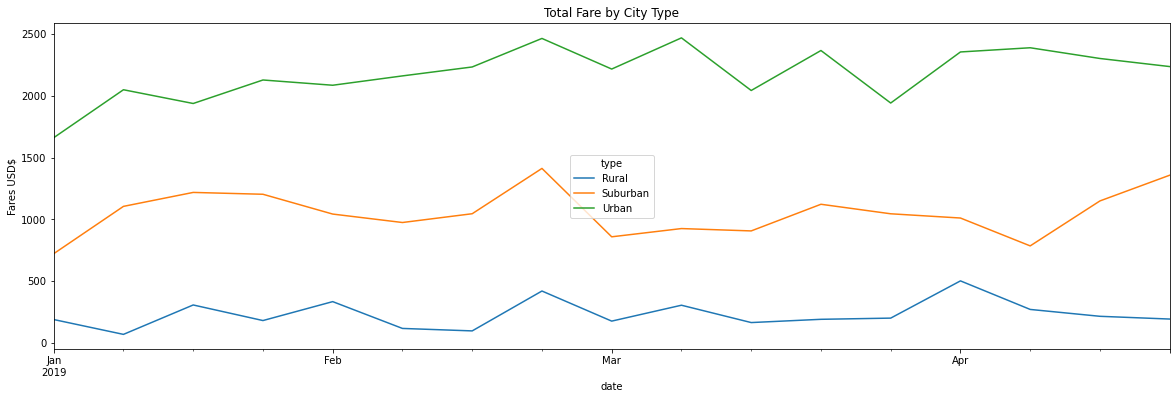

In [46]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Create the plot with ax.plt()


ax = weekly_fares_winter_2019_df.plot.line(figsize=(20, 6))
ax.set_ylabel('Fares USD$')
ax.set_title("Total Fare by City Type")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Analysis\City_Fares ")